# Plotting An Interactive Fourier Series Square Wave #
Fourier's theorem states that a periodic function may be broken down to the sum of functions of sine and cosine.

In this task I will be plotting a square wave from the Fourier series for a square wave, which is given below: $$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right)$$ The sum function starts at 1 and goes upto infinity, however this cannot be plotted on a graph, therefore a maximum value for n is chosen, so that it can be plotted.

In [1]:
import numpy as np #Imports the numpy coding package as "np"
import matplotlib.pyplot as plt #Imports the matplotlib.pyplot graphing package as "plt"

from ipywidgets import interactive #Imports "interactive" function from ipywidgets package for creating an interactive plot
from IPython.display import display #Imports "display" function from IPython.display for displaying the interactive plot

%matplotlib inline

# The line below increases the default figure size. 
# Useful if you are on a large screen, you may want to
# edit it to taste or comment it out
# if you are on a small-screen laptop.
# Don't make the figure so large that you also need to adjust the text size though!
# The default proportions are there for a reason...
plt.rcParams['figure.figsize'] = 9, 6

The code cell above is for importing the relevant coding and graphing packages required for this task. Also the "%matplotlib inline" is to plot the graphs in the notebook, as opposed to outside of the notebook. Also the last line of code is used to increase the size of the figure that appears on screen, so that it is easier to read and analyse.

<div class="alert alert-success">
The code cell below defines our initial data. A value for $L$, the period of the function, has already been set. Add a line that will create an array, named `x`, of values to use for the x-values for the plot from 0 to $5\pi$, with an appropriate number of points to result in a smooth function on the plot (you can come back and adjust this later).
<div>


In [2]:
#Set up initial data
L = np.pi #Period of the function is [−L,L]
x = np.linspace(0,5*np.pi,1000) #Creates an array of 1000 point of x values, between 0 and 5π

"L" has already been pre-assigned to be "pi", which is the period of the function. Also an array, "x", has been created with lower and upper bounds, 0 and 5π, with 1000 points equally spaced between these values. This is to ensure that the graphs plotted will show a smooth function, which can only be achieved by having a high enough number of point to ensure smoothness without compromising run time.

<div class="alert alert-success">
The code cell below contains the start of a function that needs to calculate the Fourier series for a square wave, i.e. it codes the mathematical function
$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right) \qquad \qquad (1)$$ 
for all $n$ up to and including $n = $ <tt>n_terms</tt> (as we will need to truncate our series at some finite point rather than continuing all the way to $n = \infty$). The docstring has already been written for you.

<ul>
<li>
Complete the function to calculate the Fourier series for the number of terms <tt>n_terms</tt> specified in the function input. </li>
<li> <b>Don't change any of the variable names or the docstring. </b>Follow the specification given. </li>
<li>Use a new text cell, as well as appropriate code comments, to describe your function.</li>
</ul>

<b> Note:</b> Here the variable <tt>L</tt> will act as a _global_ variable. It is defined in the cell above, and when you reference <tt>L</tt> in your function it will use that value of <tt>L</tt>, without having to explicitly pass it to the function. In other words, you don't need to redefine <tt>L</tt> within your function.

<b> HINTS:</b> You will need to use the same kind of looping structure that you used in the series summation task for session 2. Think carefully about the differences and similarities between that summation and this one. In particular:
<ul>
<li>What are the start and end points of the summation?</li>
<li>Are we summing over all values of n? How will you deal with this?</li>
<li>Note that we're going to be calculating this for an array of x-values - however, as we saw in the "sincfn" example, this doesn't make any difference to the way the function is coded; it will automatically work either for a single x-value or an array.</li>
</ul>

<div>


In the code cell below I have defined the Fourier Series, which can be used to plot a square wave. I have used a while loop in order to find the sum of all odd values of n upto and including "n_terms" provided it is an odd number. The function finds value of $ \frac{4}{\pi} \frac{1}{n} \sin(\frac{n\pi x}{L}) $ from n = 1 all the way to n = "n_terms", and sums each to the previous value. This will eventually give the final value which is equal to the sum of the function from n = 1 to n = "n_terms". The input x values, "x_input", is for any single value of x or an array containing many x values.

In [3]:
def fourier_sum(x_input,n_terms): #Definition for Fourier series with required inputs
    '''function that creates the Fourier series for square wave.
    Inputs:
    x_input: array of x-values or single x-value
    n_terms: maximum value of n in summation from eqn(1) above
    Returns:
    fourier: array of y-values for Fourier square wave
    '''
    n = 1 #Initializes the counter
    value = 0 #This initializes the initial value
    while n <= n_terms : #This line will start the while loop, as well as setting the condition of the loop
        newterm = (np.sin(np.pi*n*x_input/L)*(1/n))*(4/(np.pi)) #This calculates the value of the new term in the Fourier Series
        value = value + newterm #This determines the value of the sum function
        n = n + 2 #To make sure that only odd values of n are used for the sum function
    return value #When the while loop is completed, this outputs the value of the sum from n=1 to n=n_terms

In [4]:
# check all is well before proceeding!
print("At x = pi and n_terms = 1, my function returns", fourier_sum(np.pi,1), "(it should be zero)")
print("At x = pi/2 and n_terms = 5, my function returns", fourier_sum(np.pi/2,5), "(it should be 1.10347...)")

At x = pi and n_terms = 1, my function returns 1.55926873301e-16 (it should be zero)
At x = pi/2 and n_terms = 5, my function returns 1.1034742721 (it should be 1.10347...)


As you can see above the defined Fourier series is working as planned. However for x = $\pi$ and n_terms = 1, the function doesn't return exactly 0, nevertheless the returned value is so small in terms of its order of magnitude that it should be considered to be 0 and, and hence the function to be working.

<div class="alert alert-success">
Now you need to write a function that will plot the Fourier series.

The function in the code cell below, when completed, should 
<ul>
<li>call your <tt>fourier_sum</tt> function from above to calculate the Fourier series for the number of terms as given in the input (i.e. n_terms); then</li>
<li> plot it on a suitably labelled graph.</li>
</ul><br>
Don't forget the docstring! <br><br>
Also remember that if you are using Desktop@UCL you will need to include `plt.show()` at the end of your function.

<div>


In [5]:
def plot_fourier(n_terms): #Definition for Fourier series graph with required inputs
    ''' The Fourier series for a number of terms n_terms, will be plotted by this function,
    which requires that the global variable x is already defined. '''
    
    y = fourier_sum(x,n_terms) #Calculates the y values based on current value of n_terms from slider of the graph
    plt.plot(x, y, linewidth=0.75, color='b') #Plots the x values against the y values as a blue line with a line of width 0.75
    plt.ylabel("Fourier Sum(x)") #Label for the y axis of the plot
    plt.xlabel("x") #Label for the x axis of the plot
    plt.title("Plot of Fourier Square Function") #This is the title of the plot
    # The next line is only strictly necessary if you're using the buggy version of Anaconda that's on Desktop@UCL
    # however on an up-to-date installation it doesn't cause any problems
    plt.show() #This line is required to show the plots on Desktop@UCL

This above code cell is used to define the graph for the Fourier series, which will be plotted later for one value of n and then as a slider for when "n_terms" is changed.

<div class="alert alert-success">
Now test that everything is running OK before you attempt to use the interactive slider. Add a single line in the cell below that will call your function to calculate and plot your Fourier series with $n= 3$. Does this look like how you'd expect? If not, go back and adjust your code until it does. Check it with other values of $n$ as well, and make sure you're happy with the results.
<div>


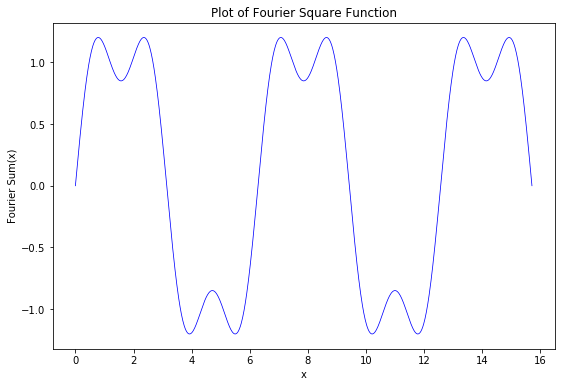

In [6]:
plot_fourier(3)

The above is to plot the Fourier series for one value of n, which is n = 3, and the graph is what I would expect for this value of n = 3.

<div class="alert alert-success">
The final code cell needs to plot your Fourier series with a slider so that you can vary the number of terms in the series and see how the square wave builds up as you move the slider and increase the number of terms in the series. Choose a sensible maximum number of terms (i.e. use your judgement to decide when adding extra terms either no longer adds any sensible information to the plot, or slows down the working of the code).

<br> 
Use a text cell to explain
<ul>
<li> Your choice of maximum number of terms </li>
<li> What is happening when the slider moves from 1$\rightarrow$2,  3$\rightarrow$4, 5$\rightarrow$6 etc.</li>

<div>


In [7]:
fourier_plot = interactive(plot_fourier, n_terms=(1,200,1))
display(fourier_plot)

As the value of "n_terms is increased, the shape of the graph closer resembles the square shape expected. I have decided to use 200 as maximum number of terms, as it is a high enough value for the graph to take a square shape. Anymore of an inrease beyond 200, will change very little in terms of the square shape of the graph, however it will definitely increase the run time of the code, which will reduce efficiency.

As the slider is moved from left to right, the number of terms is increased, however the shape of the graph only changes for odd values of "n_terms". As the terms is increased from one odd number to the next, and extra dip is added, in the opposite direction, to each peak.